# Exercise: The Matched Filter

David R. Thompson, Jet Propulsion Laboratory, California Institute of Technology<br>
Contact: david.r.thompson@jpl.nasa.gov
__________

This exercise applies a background-adaptive matched filter to detect a fugitive methane emission from a petrochemical facility.  We load the data cube, which is rectangular, i.e. not projected into geographic coordinates.  Consequently, each column corresponds to a different element on the focal plane array.  We also load a target signature for methane.  Note that the signature is scaled by a factor of 1e-5, so you'll have to multiply the matched filter result by 10000 to get units of ppm m.

In [2]:
import numpy as np
from scipy.linalg import norm, inv
import pylab as plt
import figure_style

# Load the target, call it t
targ = np.loadtxt('data/ang_ch4_unit_3col_425chan.txt')
wavelengths = targ[:,1]
t = targ[:,-1]

# Load the data - BIP interleave
filename = 'data/ang20160910t185702_rdn_v2n2_clip_subset'
rows, cols, bands = 600, 598, 425
mm = np.memmap(filename, dtype=np.float32, mode='r', shape=(rows,cols,bands))
X = np.asarray(mm).copy()

Now apply any necessary preprocessing to condition the data, and calculate sample means and covariances.  Plot the covariance structure.

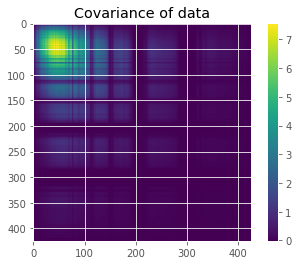

<Figure size 432x288 with 0 Axes>

In [4]:
# zero the deep water features and bad calibration in the extreme SWIR
opaque = np.logical_or(np.logical_and(wavelengths>1280, wavelengths<1450),
                       np.logical_and(wavelengths>1750, wavelengths<2000))
badcalibration = wavelengths>2480
bad = np.logical_or(opaque, badcalibration)

X = X.reshape((rows*cols, bands))

# A subset of pixels is sufficient, say one out of every 100
subset = np.arange(0,X.shape[0],100)
Xsub = X[subset,:]
mu = Xsub.mean(axis=0)

# Calculate the covariance
Cov = np.cov(Xsub, rowvar=False);

plt.imshow(Cov)
plt.colorbar()

plt.title('Covariance of data')
plt.savefig('images/covariance.png');
plt.figure();

Finally, project the data using the matched filter. Recall that we have formulated the operator, for a test spectrum $\bf x$, a background with mean $\mu$ and covariance matrix $\bf \Sigma$, and a target $\bf t$, as:
$$ \alpha(\bf x) = \frac{(x - \mu)^T\Sigma^{-1}t}{t^T \Sigma^{-1} t} $$

<b> Question 1: </b> Where is the plume originating?

<b> Question 2: </b> What is the maximum enhancement above background?

<b> Question 3: </b> How does changing the regularization of the covariance affect the sensitivity?

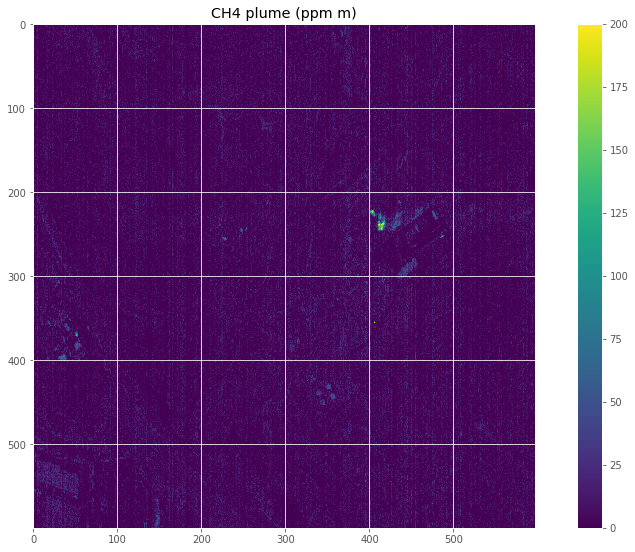

In [6]:
# Expand the figure size
from IPython.core.pylabtools import figsize
figsize(15,15/1.618)

# Add some regularization
Cinv = inv(Cov + np.eye(len(wavelengths))*1e-8)
mf = ((X-mu).dot(Cinv.dot(t)))/(t.dot(Cinv.dot(t)))

mf = mf.reshape((rows, cols))
plt.imshow(mf * 10000.0)
plt.colorbar()
plt.clim([0,200])
plt.title('CH4 plume (ppm m)')
plt.imsave('MF2.png',mf*10000.0)

-------------
<b>Acknowledgements</b>: A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. We acknowledge the support of a PRISM AITT grant from the National Aeronautics and Space Administration (NASA) Earth Science Technology Office. We acknowledge the support of the JPL and Caltech Presidents’ and Directors’ Fund Program. We thank other supporting sponsors including the NASA Earth Science Division for the HyspIRI preparatory campaign, the AVIRIS-NG instrument and the data analysis program “Utilization of Airborne Visible/Infrared Imaging Spectrometer Next Generation Data from an Airborne Campaign in India” NNH16ZDA001N-AVRSNG, for its support of the algorithm development; the Jet Propulsion Laboratory Research and Technology Development Program; and the NASA Center Innovation Fund managed in conjunction with the Jet Propulsion Laboratory Office of the Chief Scientist and Technologist. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.